In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Dataset
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope
**Reference**
Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [456]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConcl', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic+gamma+telescope/magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [457]:
df['class'].unique() # There are only 2 class -> binary classification
# This is supervised learning because we already know the answer.

array(['g', 'h'], dtype=object)

In [458]:
df['class'] = (df['class'] == 'g').astype(int) # Change the class column to containing 0 and 1

In [459]:
print(df.head())
print(len(df['class']))

    fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  
19020


# Loss Function
L1 Loss: loss = sum(|y_real - y_predicted|)

L2 Loss: loss = sum((y_read - y_predicted)^2)

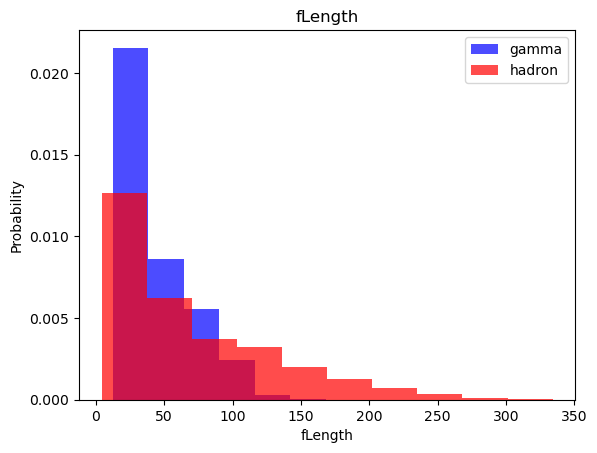

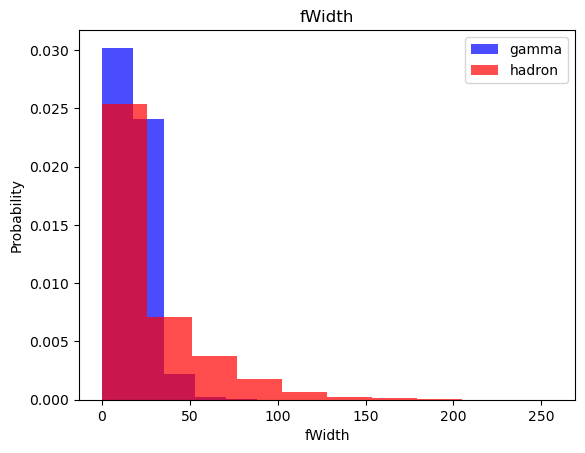

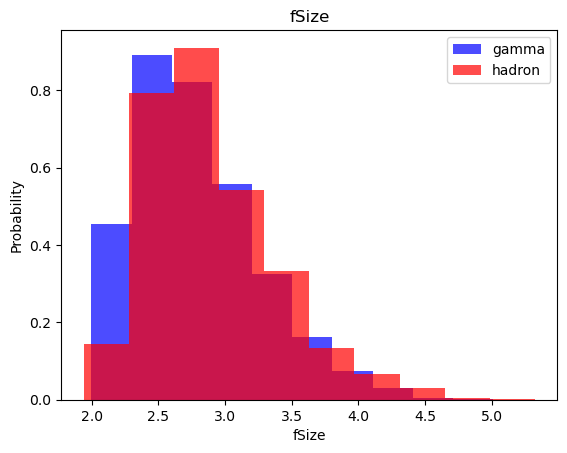

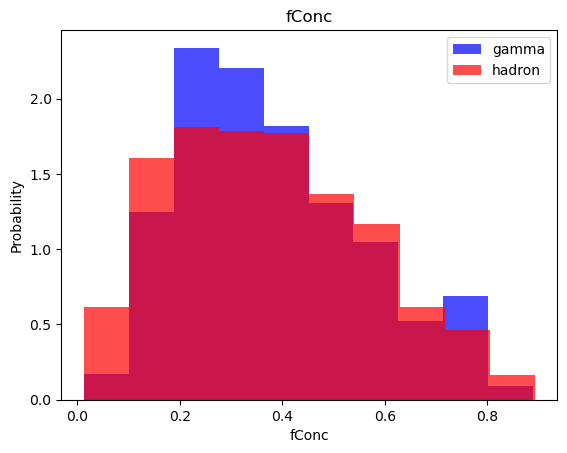

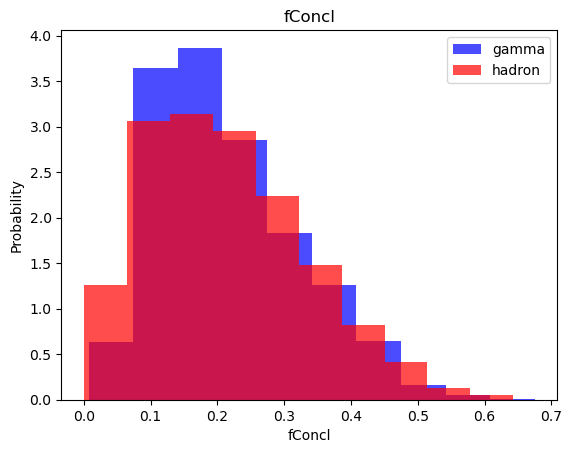

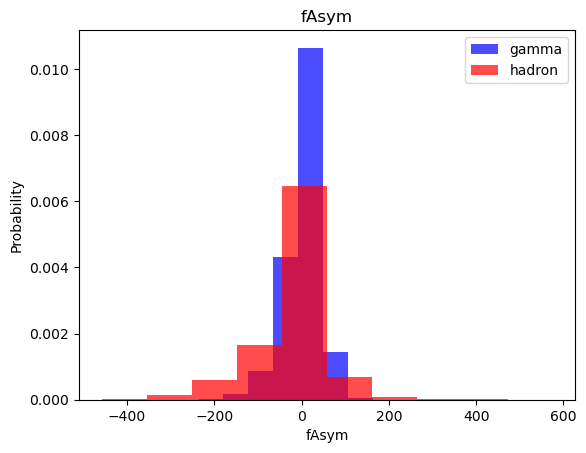

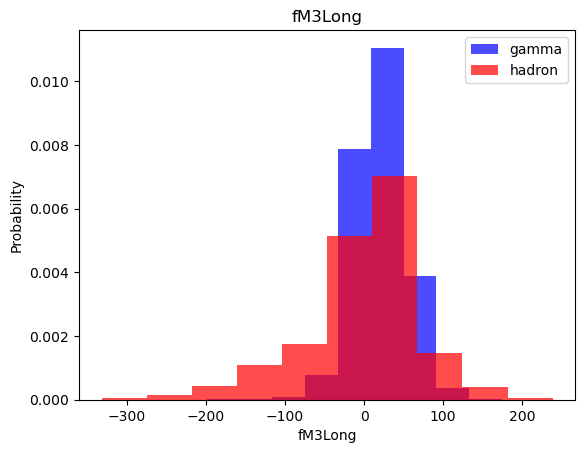

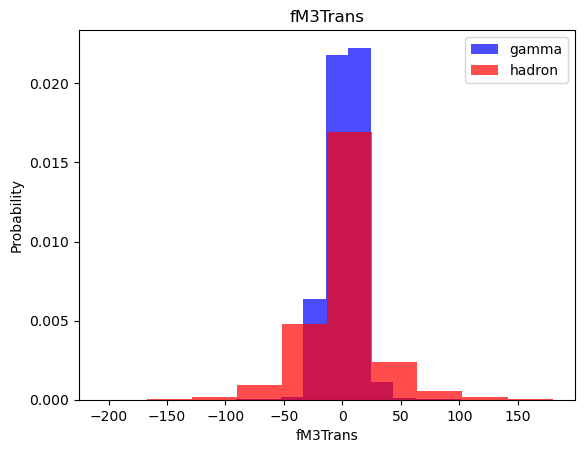

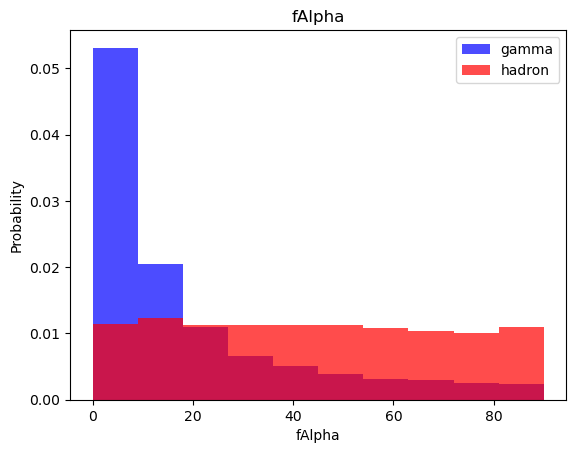

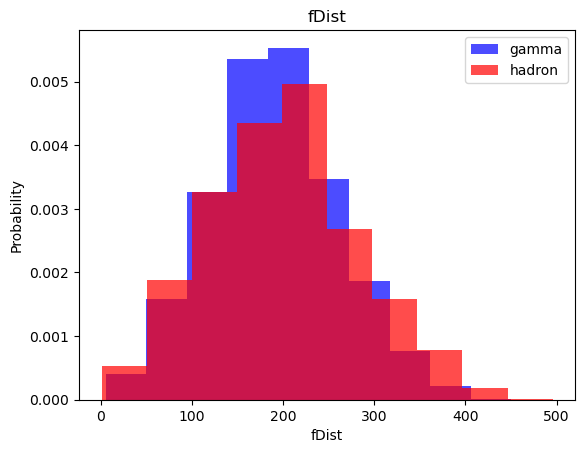

In [460]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density = True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density = True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, vadidation, test datasets

Split data into train, vadiation, and test datasets

In [461]:
train, validate, test = np.split(df.sample(frac = 1), [int(0.6 * len(df)), int (0.8*len(df))]) # 0-60%: Training, 60-80%: validate, 80-100%: testing

/Users/luannguyen/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Scale value of data set into the same value and put horizontally stack its together, also make the two dataset have the same number of 1 and 0

In [462]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1,1))))
    
    return data, x, y

In [463]:
print(len(train))
print(len(validate))
print(len(test))

11412
3804
3804


In [464]:
train, x_train, y_train = scale_dataset(train, oversample = True)
validate, x_validate, y_validate = scale_dataset(validate, oversample = False)
test, x_test, y_test = scale_dataset(test, oversample = False)
print(train)

[[-0.6282282  -0.75114262 -0.46192898 ... -0.5134223  -1.12118011
   1.        ]
 [-0.65717605 -1.01444711 -0.71785372 ... -0.97086221 -0.31091453
   0.        ]
 [ 1.0707229  -0.25101449 -0.62061916 ...  2.37392552  0.17403022
   0.        ]
 ...
 [-0.51728738  0.4067159   0.18609098 ... -0.76462554 -0.2706536
   0.        ]
 [ 2.07969593  2.40727266  1.4436159  ...  0.22409215  1.02009778
   0.        ]
 [-0.57163243 -0.54075007 -0.61114826 ...  2.07388198 -0.50639232
   0.        ]]


In [465]:
print(len(train))
print(sum(y_train == 1))
print(sum(y_train == 0))

14852
7426
7426


In [466]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [467]:
print(len(validate))
print(sum(y_validate == 1))
print(sum(y_validate == 0))

3804
2444
1360


In [468]:
print(len(test))
print(sum(y_test == 1))
print(sum(y_test == 0))

3804
2462
1342


After the step above, the data has been properly formatted

### k-nearest neighbour

In [469]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [470]:
print(x_train)
print(y_train)
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

[[-0.6282282  -0.75114262 -0.46192898 ... -0.22774493 -0.5134223
  -1.12118011]
 [-0.65717605 -1.01444711 -0.71785372 ...  0.26696861 -0.97086221
  -0.31091453]
 [ 1.0707229  -0.25101449 -0.62061916 ...  0.63928796  2.37392552
   0.17403022]
 ...
 [-0.51728738  0.4067159   0.18609098 ... -1.47407814 -0.76462554
  -0.2706536 ]
 [ 2.07969593  2.40727266  1.4436159  ...  3.91556303  0.22409215
   1.02009778]
 [-0.57163243 -0.54075007 -0.61114826 ... -0.0067817   2.07388198
  -0.50639232]]
[1 0 0 ... 0 0 0]


KNeighborsClassifier(n_neighbors=3)

In [471]:
y_predict = knn_model.predict(x_test)
print(y_predict)

[1 0 1 ... 1 1 1]


In [472]:
print(y_test)

[1 0 1 ... 1 0 1]


**Model: Precision and Recall**: https://en.wikipedia.org/wiki/Precision_and_recall

In [473]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1342
           1       0.85      0.85      0.85      2462

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



### Model: Naive Bayes
P(X|Y) -> probability of X given Y
P(C|x1,x2,...,xn)

In [474]:
from sklearn.naive_bayes import GaussianNB

In [475]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [476]:
y_predict = nb_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1342
           1       0.74      0.90      0.81      2462

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression

In [477]:
from sklearn.linear_model import LogisticRegression

In [478]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [479]:
y_predict = lg_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1342
           1       0.85      0.81      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



# SVM

In [480]:
from sklearn.svm import SVC

In [481]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [482]:
y_predict = svm_model.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1342
           1       0.89      0.89      0.89      2462

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Net

In [483]:
import tensorflow as tf

In [484]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.show()

In [485]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [486]:
nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(0.001), #Adam has learning rate of 0.001
                 loss = 'binary_crossentropy',
                 metrics=['accuracy'])

In [487]:
history = nn_model.fit(x_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
372/372 [==============================] - 0s 773us/step - loss: 0.4509 - accuracy: 0.7871 - val_loss: 0.5502 - val_accuracy: 0.7132
Epoch 2/100
372/372 [==============================] - 0s 601us/step - loss: 0.3680 - accuracy: 0.8406 - val_loss: 0.5394 - val_accuracy: 0.7253
Epoch 3/100
372/372 [==============================] - 0s 633us/step - loss: 0.3495 - accuracy: 0.8522 - val_loss: 0.5000 - val_accuracy: 0.7391
Epoch 4/100
372/372 [==============================] - 0s 642us/step - loss: 0.3405 - accuracy: 0.8557 - val_loss: 0.5958 - val_accuracy: 0.6991
Epoch 5/100
372/372 [==============================] - 0s 610us/step - loss: 0.3347 - accuracy: 0.8570 - val_loss: 0.4826 - val_accuracy: 0.7587
Epoch 6/100
372/372 [==============================] - 0s 612us/step - loss: 0.3295 - accuracy: 0.8595 - val_loss: 0.5334 - val_accuracy: 0.7284
Epoch 7/100
372/372 [==============================] - 0s 605us/step - loss: 0.3265 - accuracy: 0.8615 - val_loss: 0.4759 - val_ac

372/372 [==============================] - 0s 619us/step - loss: 0.2777 - accuracy: 0.8853 - val_loss: 0.4298 - val_accuracy: 0.7772
Epoch 58/100
372/372 [==============================] - 0s 610us/step - loss: 0.2779 - accuracy: 0.8837 - val_loss: 0.3946 - val_accuracy: 0.7977
Epoch 59/100
372/372 [==============================] - 0s 615us/step - loss: 0.2763 - accuracy: 0.8853 - val_loss: 0.4381 - val_accuracy: 0.7836
Epoch 60/100
372/372 [==============================] - 0s 598us/step - loss: 0.2768 - accuracy: 0.8852 - val_loss: 0.3940 - val_accuracy: 0.7980
Epoch 61/100
372/372 [==============================] - 0s 621us/step - loss: 0.2753 - accuracy: 0.8854 - val_loss: 0.4145 - val_accuracy: 0.7809
Epoch 62/100
372/372 [==============================] - 0s 602us/step - loss: 0.2758 - accuracy: 0.8846 - val_loss: 0.4508 - val_accuracy: 0.7718
Epoch 63/100
372/372 [==============================] - 0s 635us/step - loss: 0.2767 - accuracy: 0.8861 - val_loss: 0.4637 - val_accuracy

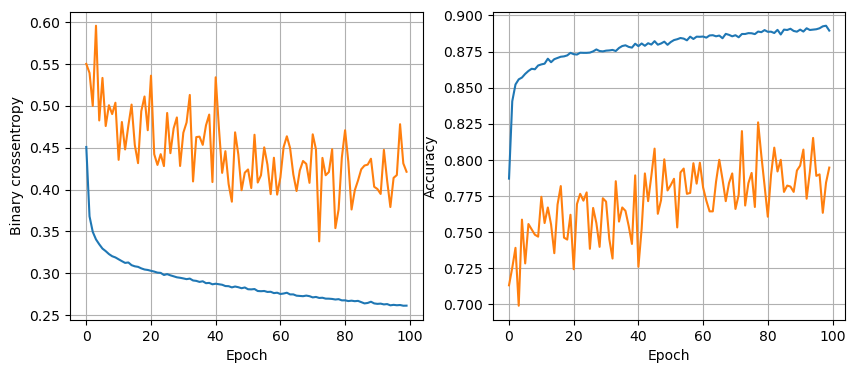

In [488]:
plot_history(history)

Now we will write an automation scrpit to so it will automatic change number of node and take the most efficient

In [492]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation = 'relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr), loss = 'binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0
    )
    
    return nn_mode, history

16 nodes, dropout 0, lr 0.01, batch size 32


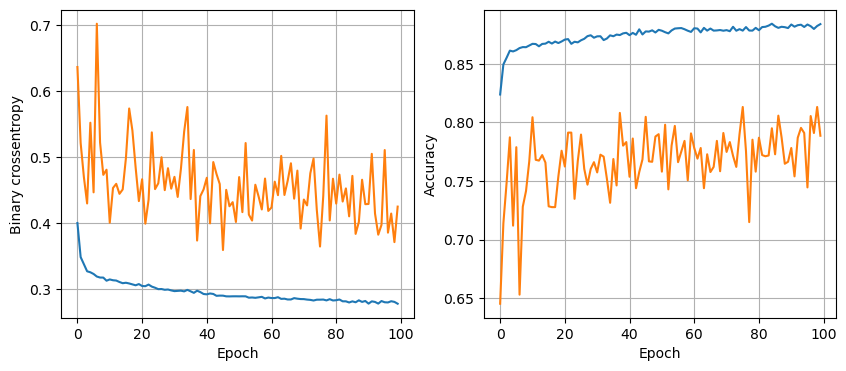

119/119 [==============================] - 0s 376us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.01, batch size 64


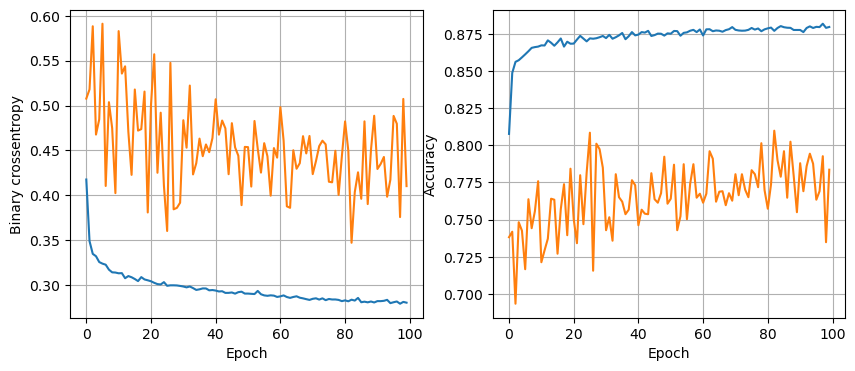

119/119 [==============================] - 0s 358us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.01, batch size 128


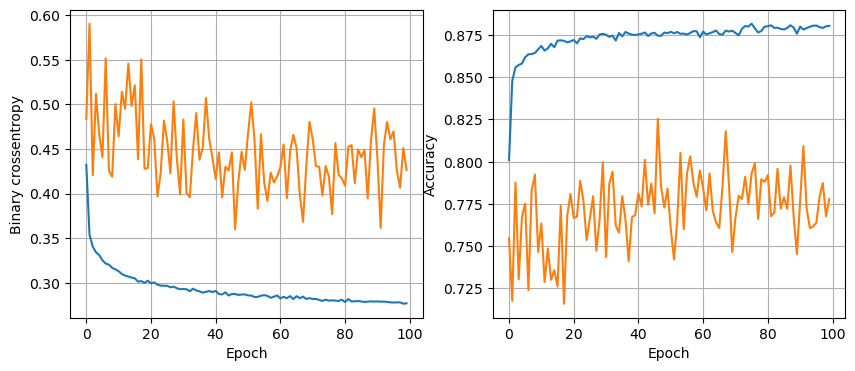

119/119 [==============================] - 0s 360us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.005, batch size 32


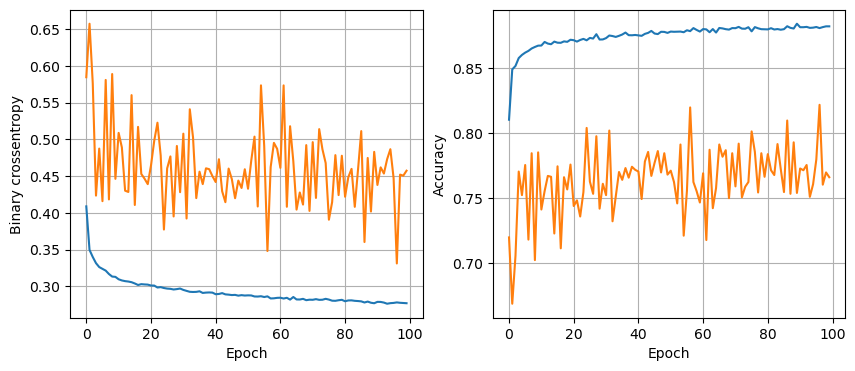

119/119 [==============================] - 0s 374us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.005, batch size 64


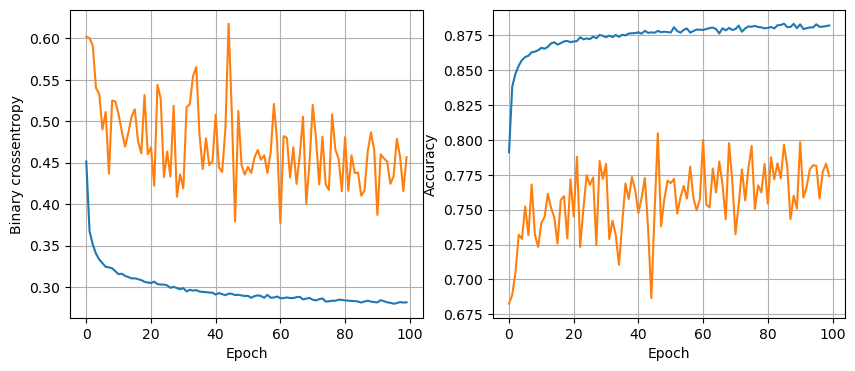

119/119 [==============================] - 0s 495us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.005, batch size 128


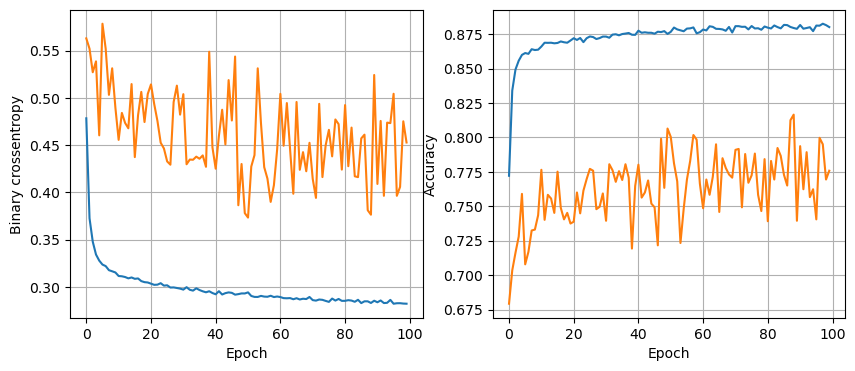

119/119 [==============================] - 0s 369us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.001, batch size 32


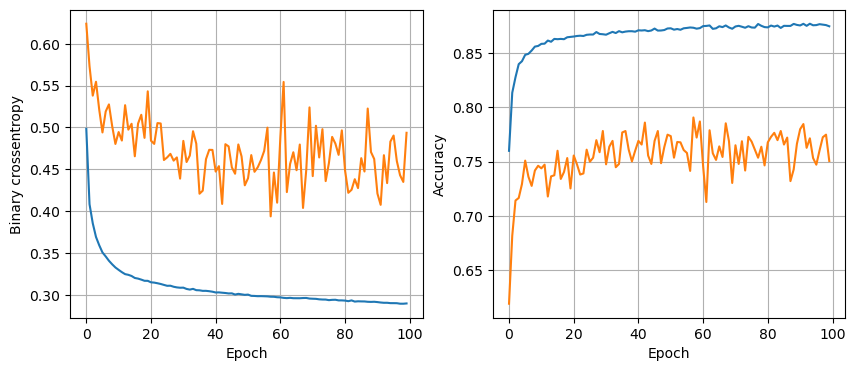

119/119 [==============================] - 0s 388us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.001, batch size 64


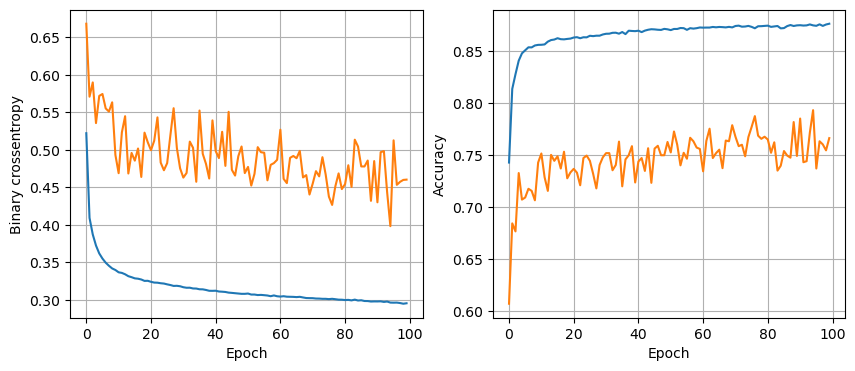

119/119 [==============================] - 0s 377us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0, lr 0.001, batch size 128


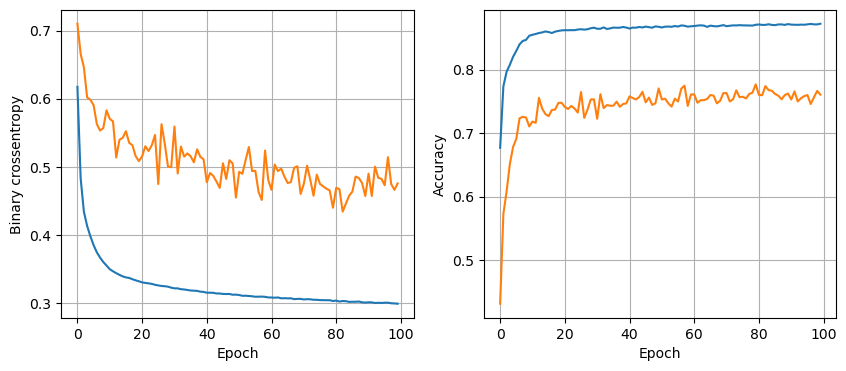

119/119 [==============================] - 0s 349us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0.2, lr 0.01, batch size 32


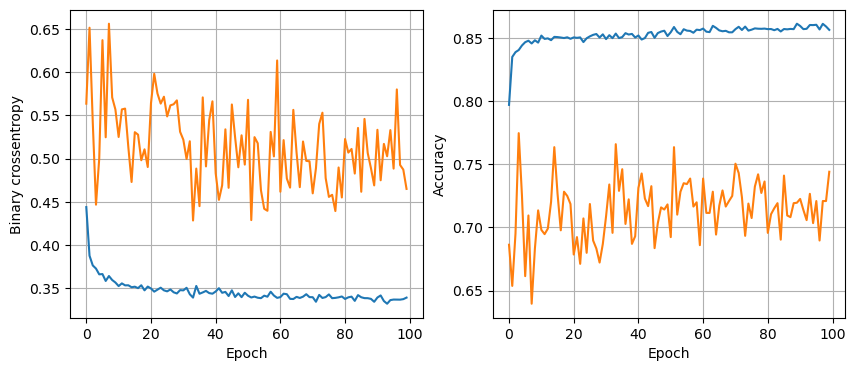

119/119 [==============================] - 0s 381us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0.2, lr 0.01, batch size 64


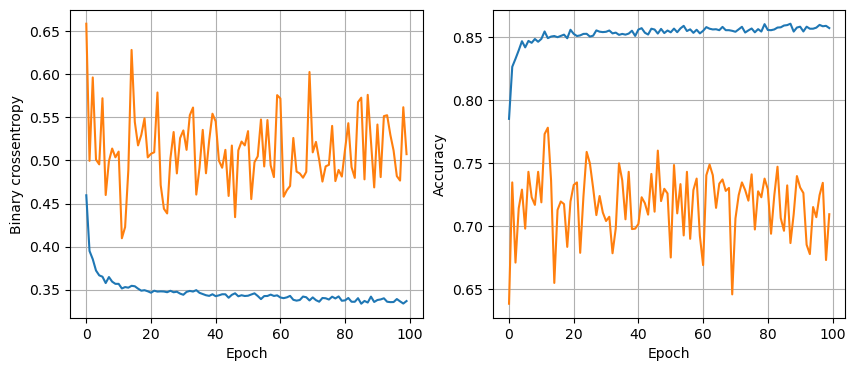

119/119 [==============================] - 0s 346us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0.2, lr 0.01, batch size 128


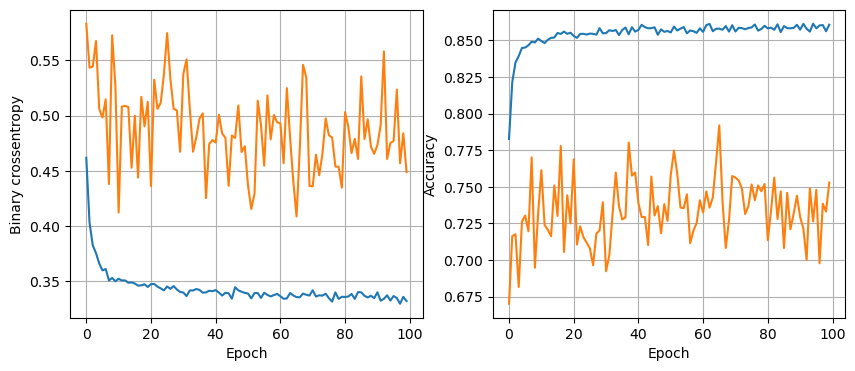

119/119 [==============================] - 0s 359us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0.2, lr 0.005, batch size 32


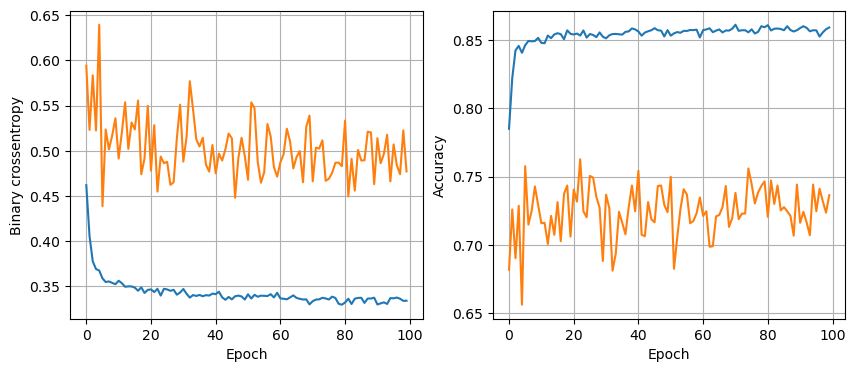

119/119 [==============================] - 0s 350us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0.2, lr 0.005, batch size 64


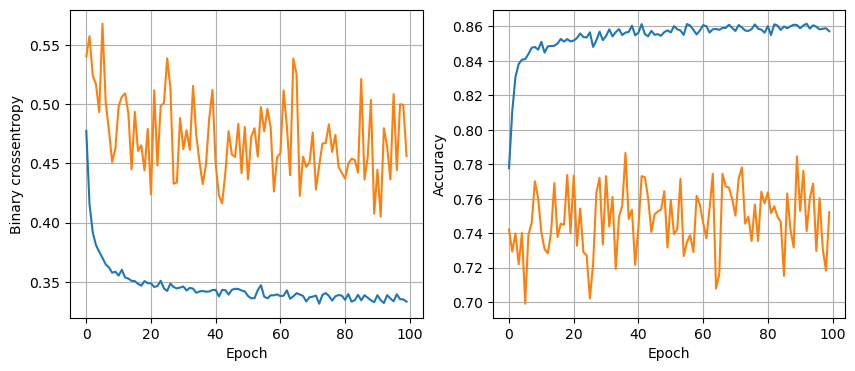

119/119 [==============================] - 0s 354us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0.2, lr 0.005, batch size 128


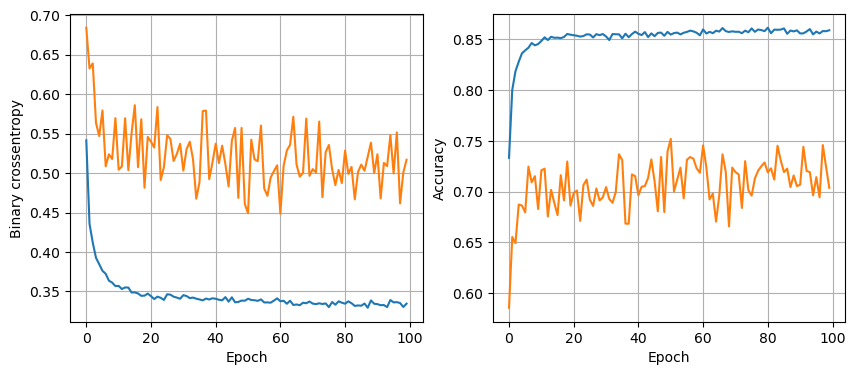

119/119 [==============================] - 0s 397us/step - loss: 0.6489 - accuracy: 0.6727
16 nodes, dropout 0.2, lr 0.001, batch size 32


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_validate, y_validate)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model